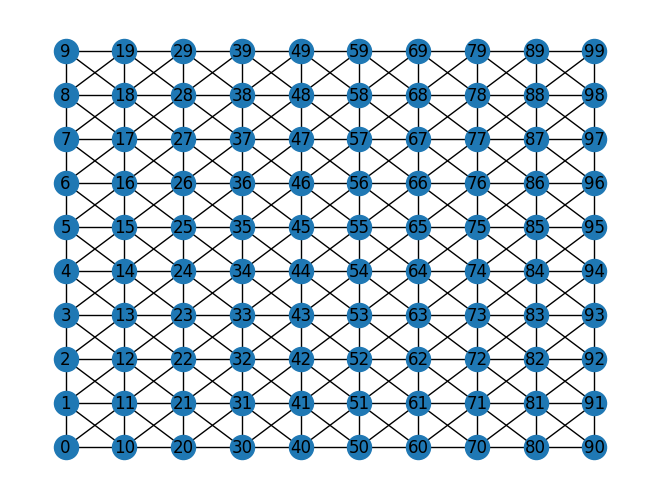

In [15]:
# Base Code 1

import networkx as nx
import matplotlib.pyplot as plt

# Get a 2d grid
N = 10
G = nx.grid_2d_graph(N, N)

# get labels positions and labels
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i*10+j) for i,j in G.nodes())

# Add diagonal labels
for u,v in G.nodes():
    if(u+1 < N and v+1 < N):
        G.add_edge((u, v), (u+1, v+1))
    if(u+1 < N and v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

# draw the graph
nx.draw(G, pos, with_labels=True, labels=labels)

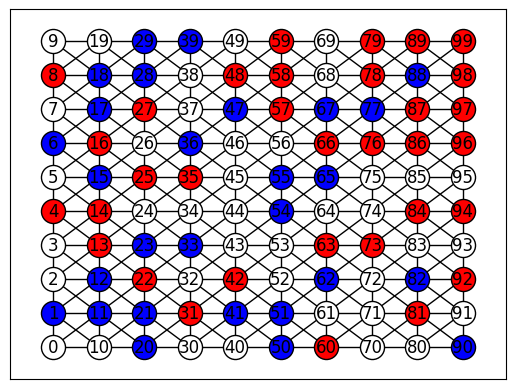

In [18]:
# Base code 2

# assign types
import random
for n in G.nodes():
    G.nodes[n]['type'] = random.randint(0, 2)

# Keep lists for types
empty_cells = [n for (n,d) in G.nodes(data=True) if d['type'] == 0]
type1_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 1]
type2_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 2]

def display_graph(G):
    nodes_b = nx.draw_networkx_nodes(G, pos, node_color='blue', nodelist=type1_nodeList, edgecolors='black')
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color='red', nodelist=type2_nodeList, edgecolors='black')
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color='white', nodelist=empty_cells, edgecolors='black')
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels=labels)
    plt.show()

display_graph(G)

In [20]:
# get boundary nodes function
def get_boundary_nodes(G):
    boundary_node_list = []

    for u,v in G.nodes():
        if(u == 0 or u == N-1 or v == 0 or v == N-1):
            boundary_node_list.append((u,v))

    return boundary_node_list


boundary_nodes = get_boundary_nodes(G)
internal_nodes = [(u,v) for (u,v) in G.nodes() if (u,v) not in boundary_nodes]

In [21]:
# Get unsatisfied nodes

def get_unsatisfied_nodes(G):
    unsatisfied = []
    threshold = 3

    directions = [(0,1), (1,0), (0,-1), (-1,0), (1,1), (1,-1), (-1,1), (-1,-1)]
    for u,v in G.nodes():
        current_type = G.nodes[(u,v)]['type']
        # if its an empty cell, skip
        if G.nodes[(u,v)]['type'] == 0:
            continue
        count = 0
        # go to all neighbours and increase the count if they are of the same type
        for du,dv in directions:
            if (u+du,v+dv) in G.nodes() and G.nodes[(u+du,v+dv)]['type'] == current_type:
                count += 1
        if count <= threshold:
            unsatisfied.append((u,v))

    return unsatisfied

In [22]:
unsatisfied_nodes = get_unsatisfied_nodes(G)
print('Unsatisfied Nodes: ')
print(unsatisfied_nodes)

Unsatisfied Nodes: 
[(0, 1), (0, 4), (0, 6), (0, 8), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 2), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 6), (3, 9), (4, 1), (4, 2), (4, 7), (4, 8), (5, 0), (5, 1), (5, 4), (5, 5), (5, 7), (5, 8), (5, 9), (6, 0), (6, 2), (6, 3), (6, 5), (6, 6), (6, 7), (7, 3), (7, 6), (7, 7), (7, 8), (7, 9), (8, 1), (8, 2), (8, 4), (8, 8), (9, 0), (9, 2), (9, 4), (9, 6), (9, 9)]


In [23]:
# Satisfy nodes
def satisfyNodes(unsatisfied_nodes, empty_cells):
    if len(unsatisfied_nodes) == 0:
        return
    
    node_to_shift = random.choice(unsatisfied_nodes)
    new_position = random.choice(empty_cells)

    # shift the node
    G.nodes[new_position]['type'] = G.nodes[node_to_shift]['type']
    G.nodes[node_to_shift]['type'] = 0

    # exchange labels
    labels[node_to_shift], labels[new_position] = labels[new_position], labels[node_to_shift]

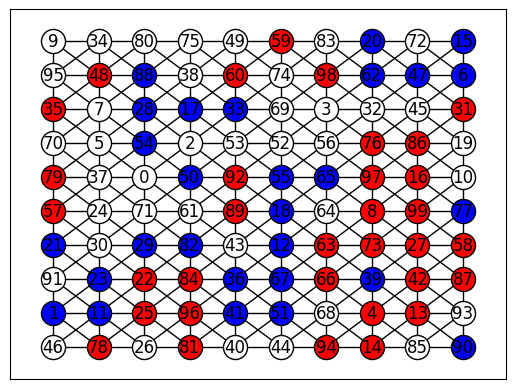

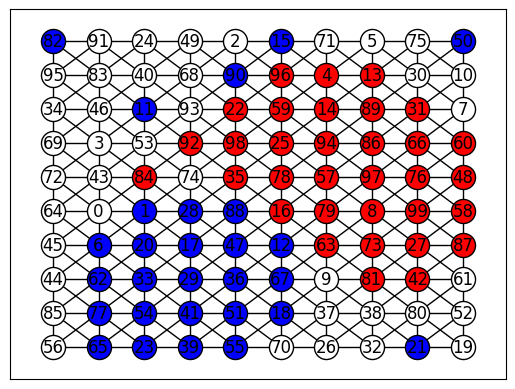

In [25]:
# satisfy the nodes

# initial graph
print('Initial Graph')
display_graph(G)

for i in range (1000):
    satisfyNodes(unsatisfied_nodes, empty_cells)
    empty_cells = [n for (n,d) in G.nodes(data=True) if d['type'] == 0]
    type1_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 1]
    type2_nodeList = [n for (n,d) in G.nodes(data=True) if d['type'] == 2]
    unsatisfied_nodes = get_unsatisfied_nodes(G)

# Final graph
print('Final Graph')
display_graph(G)